# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

# Load the Dataset 

In [2]:
rawData = pd.read_csv('marketing_campaign.csv.xls', delimiter='\t')
rawData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### From the above output, we can conclude that: -
- There are missing values in "income"
- Dt_Customer(date of a customer joing the database) is not parsed as DateTime
- There are some categorical features in our dataframe (dtype:object), so we'll encode them into Numeric form

### Dealing with Missing Values

In [4]:
# Dropping the rows having missing values
rawData = rawData.dropna()
print('Total no. of data points after removing the rows are: ', len(rawData))

Total no. of data points after removing the rows are:  2216


### Feature Creation

Creating a feature out of Dt_Customer (no. of days a customer is registered)

In [5]:
# Checking the newest and oldest recorded dates
rawData['Dt_Customer'] = pd.to_datetime(rawData['Dt_Customer'])
dates = []

for i in rawData['Dt_Customer']:
    i = i.date()
    dates.append(i)
print("Newest Customer's enrolment date in the records: ", max(dates))
print("Oldest Customer's enrolment date in the records: ", min(dates))

Newest Customer's enrolment date in the records:  2014-12-06
Oldest Customer's enrolment date in the records:  2012-01-08


Creating a feature out of Customer_For (no. of days a customer started to shop in the store relative to the last recorded date)

In [6]:
days = []

date_1 = max(dates)
for i in dates:
    delta = date_1 - i
    days.append(delta)

rawData['Customer_For'] = days
rawData['Customer_For'] = pd.to_numeric(rawData['Customer_For'], errors='coerce')

### Dealing with Categorical Data

Exploring the unique values in the categorical features

In [7]:
print('Total Categories in the feature Marital_Status:\n', rawData['Marital_Status'].value_counts(), "\n\n",
     'Total Categories in the feature Education:\n', rawData['Education'].value_counts())

Total Categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

 Total Categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# Feature Engineering

##### Age

In [8]:
rawData['Age'] = 2021 - rawData['Year_Birth']

##### Total Spending

In [9]:
rawData['Spent'] = rawData['MntWines'] + rawData['MntFruits'] + rawData['MntMeatProducts'] \
                    + rawData['MntFishProducts'] + rawData['MntSweetProducts'] + rawData['MntGoldProds']

##### Living Situation

In [10]:
rawData['Living_With'] = rawData['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner',
                                                           'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone',
                                                           'Divorced':'Alone', 'Single':'Alone'})

##### Total Children

In [11]:
rawData['Children'] = rawData['Kidhome'] + rawData['Teenhome']

##### Total Family Members

In [12]:
rawData['Family_Size'] = rawData['Living_With'].replace({'Alone':1, "Partner":2}) + rawData['Children']

##### Parenthood Status

In [13]:
rawData['Is_Parent'] = np.where(rawData.Children > 0, 1, 0)

##### Education Level

In [14]:
rawData['Education'] = rawData['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate',
                                                    'Graduation':'Gradute', 'Master':'Postgraduate', 
                                                    'PhD':'Postgraduate'})

### Renaming and Dropping irrelavant features

In [15]:
rawData = rawData.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat',
                                 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Gold'})

In [16]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = rawData.drop(to_drop, axis=1)

### Descriptive Statistics

In [17]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


The above stats show some discrepancies in mean Income & age and max Income & age.
Note:- As I calculated the age that would be today (i.e. 2021) and the data is old.

##### Plotting some selected features

<Figure size 432x288 with 0 Axes>

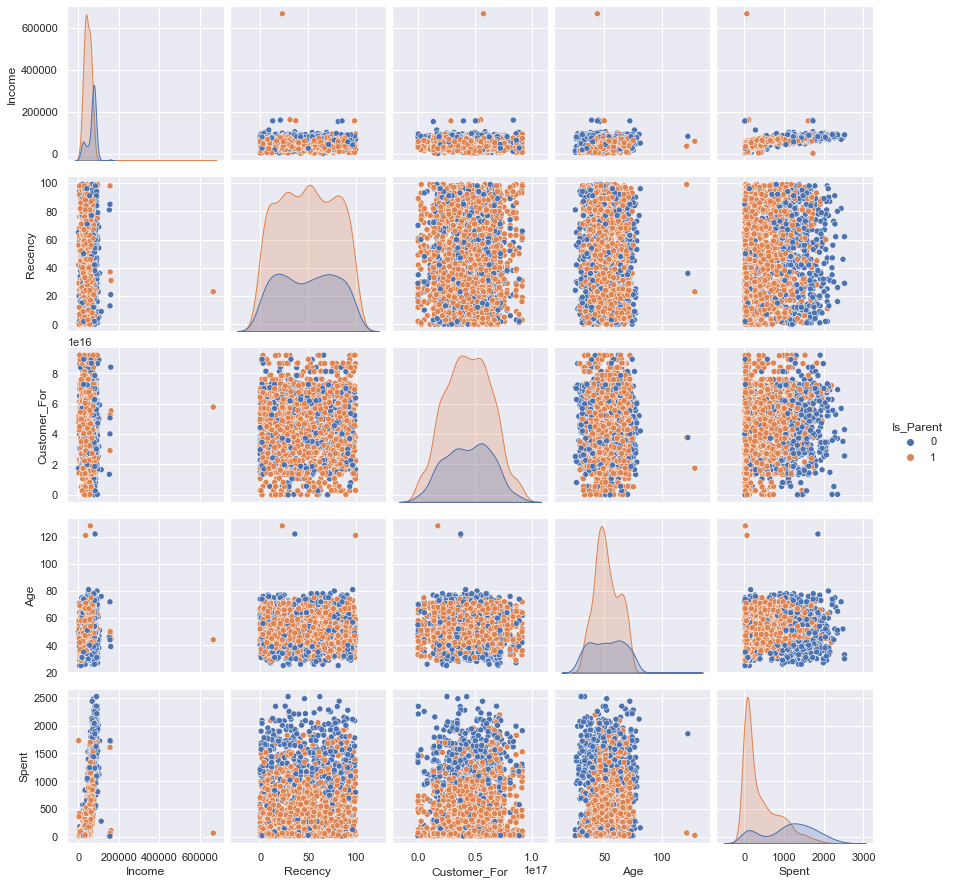

In [18]:
To_Plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']

plt.figure()
sns.pairplot(data[To_Plot], hue='Is_Parent')
plt.show()

Clearly, there are few outliers in the features - Income and Age [as the data is ~right skewed]

### Dealing with Outliers

In [19]:
# Dropping the ouliers
data = data[data['Age']<90]
data = data[data['Income']<600000]

print('Total Number of data-points after removing the outliers: ',len(data))

Total Number of data-points after removing the outliers:  2212


### Correlation of the Features

<AxesSubplot:>

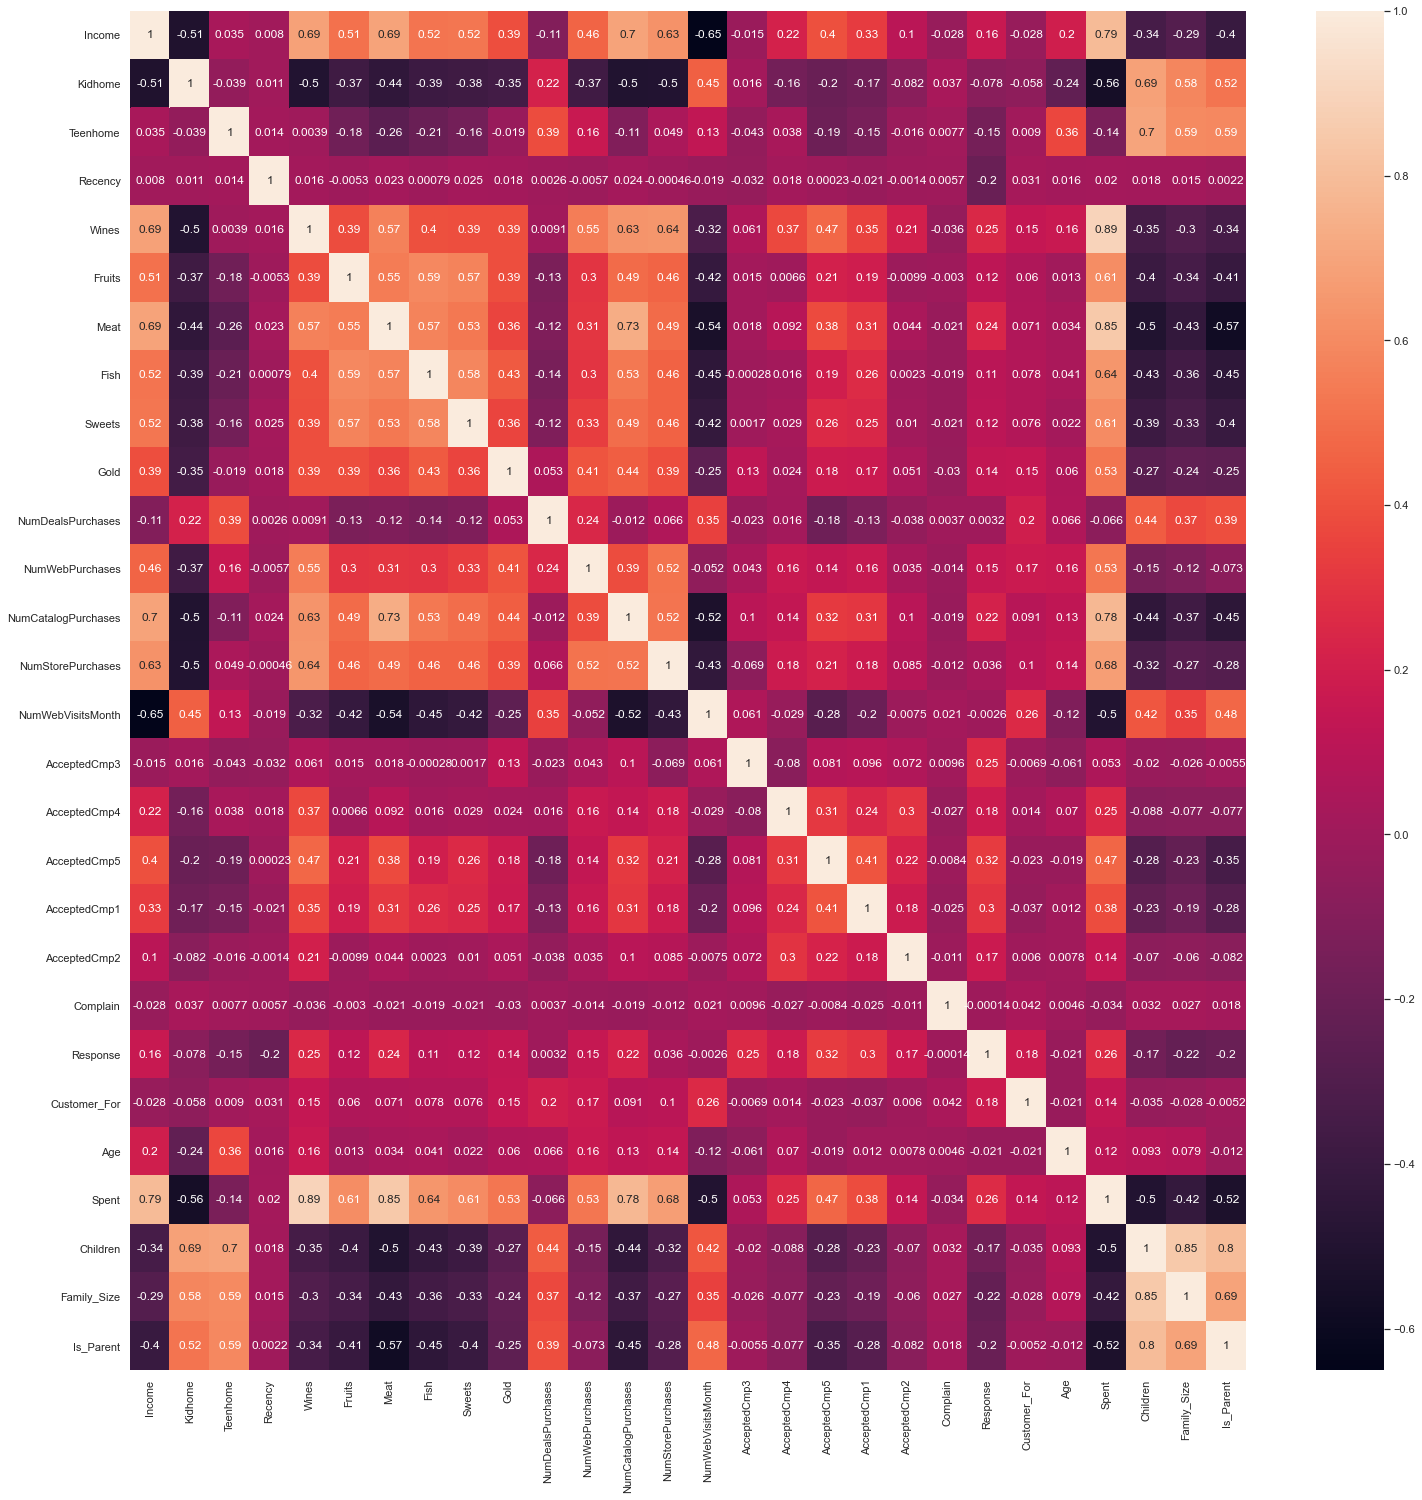

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True)

# Data Preprocessing

### Label Encoding the Categorical features

In [21]:
# Get the list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorical variables in the dataset: ', object_cols)

Categorical variables in the dataset:  ['Education', 'Living_With']


In [22]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print('All features are now numerical')

All features are now numerical


In [23]:
# Creating a copy of the data
ds = data.copy()

# Creating a subset of dataframe for PCA by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

### Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds),
                        columns=ds.columns)
print('All features are now standardized')

All features are now standardized


In [25]:
print('Df to be used for further modelling')
scaled_ds.head()

Df to be used for further modelling


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# Dimensionality Reduction (PCA)

In [26]:
from sklearn.decomposition import PCA

# Initiating PCA to reduce dimensions (features) to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)

PCA_ds = pd.DataFrame(pca.transform(scaled_ds), 
                      columns=(['col1', 'col2', 'col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-4.416800e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-8.873754e-17,1.706839,-4.312275,-1.328329,-0.157990,1.242294,6.142806
col3,2212.0,6.396832e-17,1.221957,-3.530933,-0.828452,-0.021835,0.799368,6.614039


### Plotting the reduced df

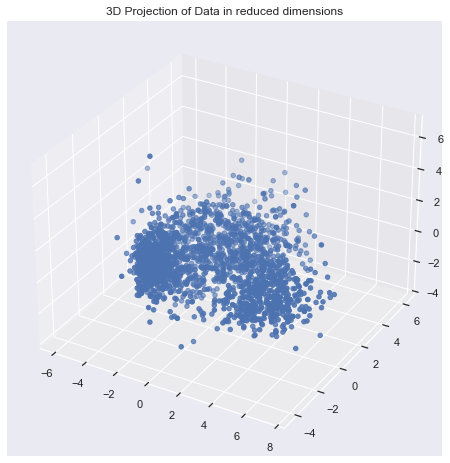

In [27]:
from mpl_toolkits.mplot3d import Axes3D

x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_title('3D Projection of Data in reduced dimensions')
plt.show()

# Clustering

In [28]:
from sklearn.cluster import KMeans

### Elbow Method

In [29]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
wcss

[28060.974123888827,
 13841.12470817935,
 9625.193270364896,
 7482.69772382864,
 6590.401529470225,
 5885.175698439919,
 5318.344316662656,
 4868.042760045427,
 4531.237863722603]

Text(0, 0.5, 'Within-cluster Sum of Squares')

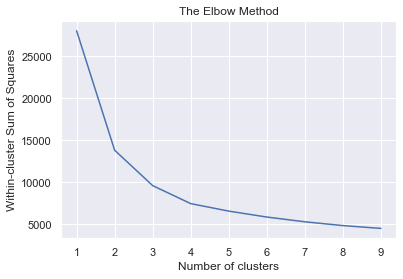

In [30]:
number_clusters = range(1, 10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Cluster of 4 would be an optimal number of cluster

### KMeans Clustering

In [31]:
kmeans_4Cluster = KMeans(n_clusters=4)
kmeans_4Cluster.fit(PCA_ds)

# Predict Clusters
yhat_Cluster = kmeans_4Cluster.fit_predict(PCA_ds)
PCA_ds['Clusters'] = yhat_Cluster

# Adding Clusters into original dataframe
data['Clusters'] = yhat_Cluster

### Plotting the cluster

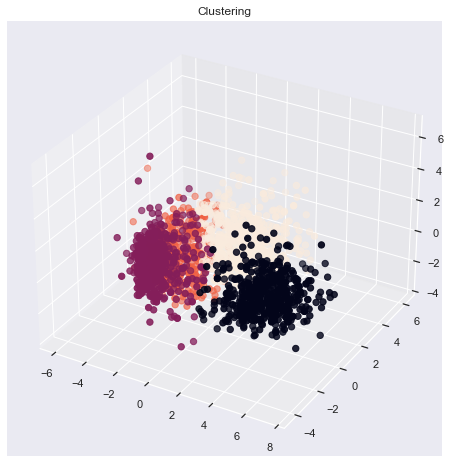

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds['Clusters'])
ax.set_title('Clustering')
plt.show()

# Evaluating Models

### Group distributions of clustering

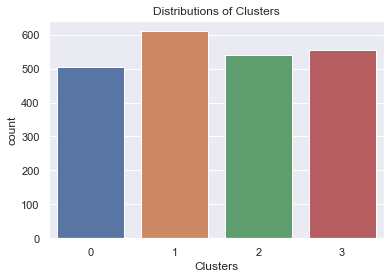

In [33]:
pl = sns.countplot(x=data['Clusters'])
pl.set_title('Distributions of Clusters')
plt.show()

The Cluster seems to be fairly distributed

### Spent vs Income Cluster

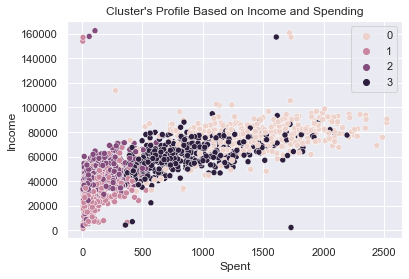

In [34]:
pl = sns.scatterplot(data=data, x=data['Spent'], y=data['Income'], hue=data['Clusters'])
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.show()

# Interpretation 1
- Group 0 = High Spending, High Income
- Group 1 = Low Spending, Low Income
- Group 2 = Low Spending, Average Income
- Group 3 = High Spending, Average Income

### Detailed Distributions of Clustering 

Clustering as per the products in the data like, Wines, Fruits, Meat, Fish, Sweets, Gold

/Users/vijaygadre/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/vijaygadre/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/vijaygadre/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/vijaygadre/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


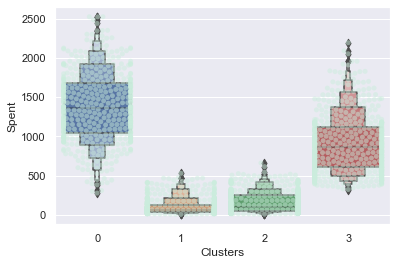

In [35]:
plt.figure()
pl = sns.swarmplot(x=data['Clusters'], y=data['Spent'], color='#CBEDDD', alpha=0.5)
pl = sns.boxenplot(x=data['Clusters'], y=data['Spent'])
plt.show()

# Interpretation 1.1  
- From the above plot, it can be clearly seen that cluster 0 is our biggest set of customers closely followed by cluster 3.

### Exploring the campaigns event

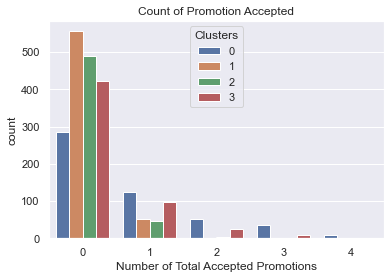

In [37]:
# Creating a feature to get the sum of accepted promotions
data['Total_Promos'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Plotting count of total campaign accepted
plt.figure()
pl = sns.countplot(x=data['Total_Promos'], hue=data['Clusters'])
pl.set_title('Count of Promotion Accepted')
pl.set_xlabel('Number of Total Accepted Promotions')
plt.show()

# Interpretation 1.2
- There has not been an overwhelming response to the campaigns so far except (campaign 1). Very few participants overall
- Moreover, no one took part in all 5 of them. Perphaps, better-targets and well-planned campaigns are required to boost sales.

### Exploring the Number of Deals

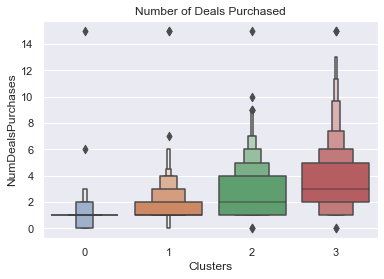

In [38]:
plt.figure()
pl = sns.boxenplot(x=data['Clusters'], y=data['NumDealsPurchases'])
pl.set_title('Number of Deals Purchased')
plt.show()

# Interpretation 1.3
- Unlike campaigns, the deals offered did well. It has best outcome with cluster 2 and 3. 
- However, our star customers, cluster 0, are not much into the deals. Nothing seems to attract cluster 1 overwhelmingly.

### Exploring the Number of Web Visits Per Month

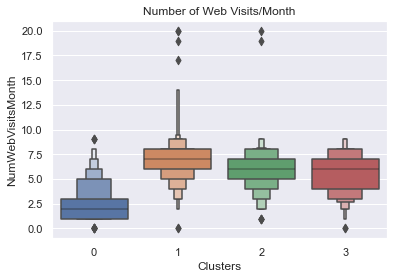

In [42]:
plt.figure()
pl = sns.boxenplot(x=data['Clusters'], y=data['NumWebVisitsMonth'])
pl.set_title('Number of Web Visits/Month')
plt.show()

### Exploring the Number of Web Purchases 

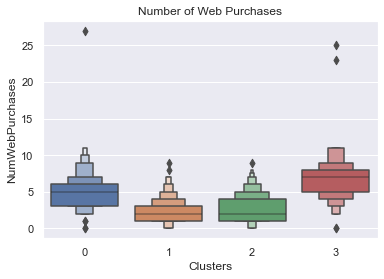

In [41]:
plt.figure()
pl = sns.boxenplot(x=data['Clusters'], y=data['NumWebPurchases'])
pl.set_title('Number of Web Purchases')
plt.show()

# Profiling
- Who is our Star Customer and who needs more attention

<Figure size 432x288 with 0 Axes>

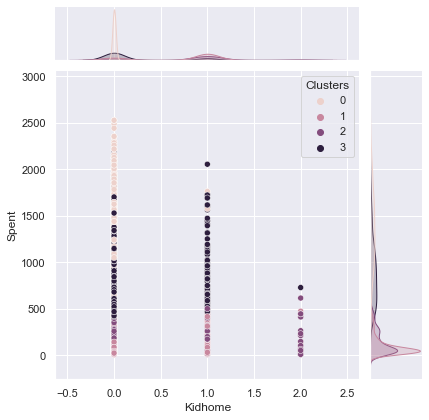

<Figure size 432x288 with 0 Axes>

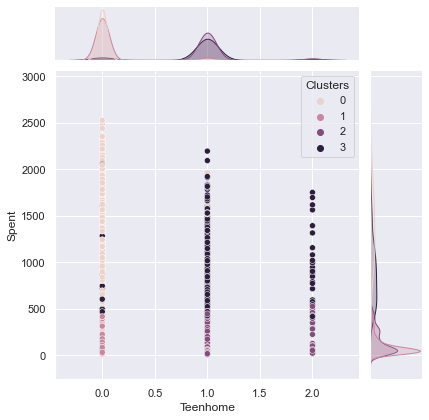

<Figure size 432x288 with 0 Axes>

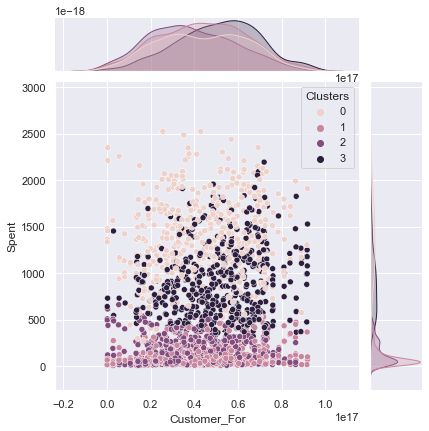

<Figure size 432x288 with 0 Axes>

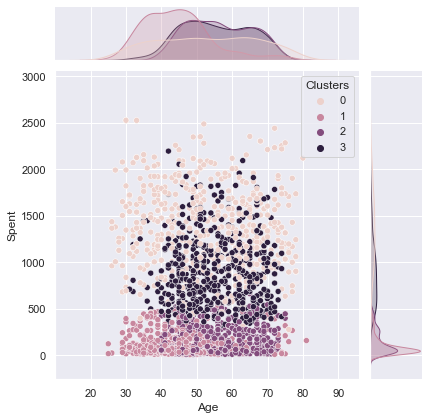

<Figure size 432x288 with 0 Axes>

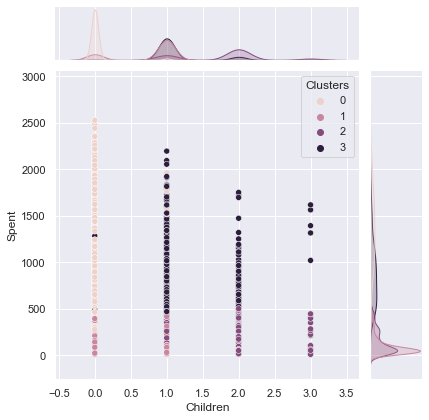

<Figure size 432x288 with 0 Axes>

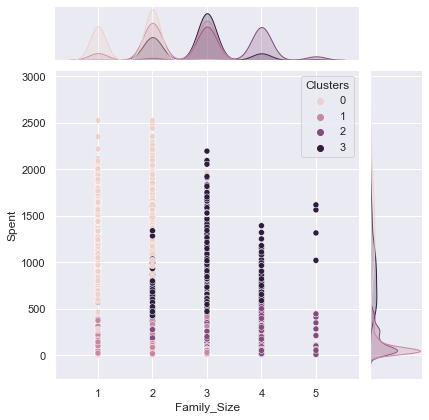

/Users/vijaygadre/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

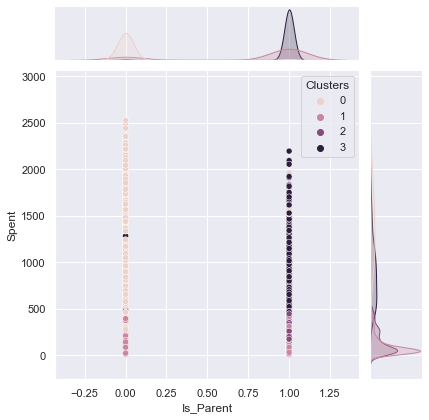

<Figure size 432x288 with 0 Axes>

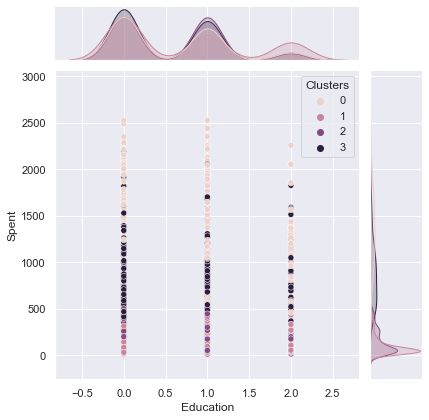

<Figure size 432x288 with 0 Axes>

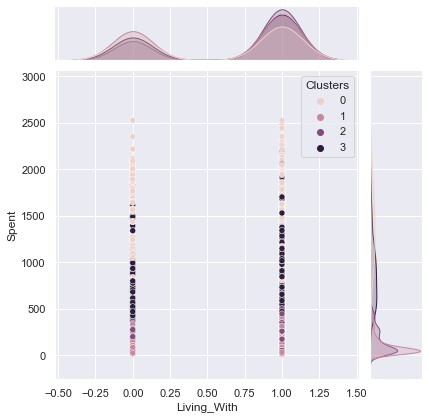

In [43]:
Personal = ['Kidhome', 'Teenhome', 'Customer_For', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data['Spent'], hue=data['Clusters'])
    plt.show()

# Interpretation 2
## Cluster 0:
- Are definitely not a parent
- At the max there are only 2 members in the family
- A slightly Majority of couples over single person
- Span all ages
- A high income group

## Cluster 1:
- The Majority of these peoples are parents
- At the max are 3 members in the family
- They majorily have one kid (and not teenagers, typically)
- Relatively

## Cluster 2:
- They are definitely a parent
- At the max are 5 members in the family and at least 2
- Majority of them have a teenager at home
- Relatively older
- A lower income group

## Cluster 3:
- Are definitely a parent
- At the max have 4 members in the family and at least 2
- Single Parent are a subset of this group
- Most have a teenegar at home
- Relatively older